Git
how to choose companies
Time stamp
Feature, Target

words or sentence? -> libraries to calculate sentiment
predictprob function
lower - case

In [1]:
import string
import pandas as pd
import numpy as np
import datetime 
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from wordcloud import WordCloud
import seaborn as sns

In [2]:
#import the stock price data
SP_df = pd.read_csv("WIKI_PRICES.csv")

In [3]:
SP_df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.105117,34.181447,27.345157,30.079673,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.355027,29.396044,27.215268,27.604936,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.240711,30.079673,27.386175,30.079673,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,29.054230,29.826730,27.516065,27.516065,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.434029,28.671398,27.345157,28.069804,3464400.0


In [4]:
#check the number of data
len(SP_df)

14935063

In [5]:
#import the news data
NEWS_df = pd.read_csv("uci-news-aggregator.csv")

In [6]:
NEWS_df = NEWS_df[NEWS_df['CATEGORY']=='b']
NEWS_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [7]:
print(NEWS_df['TIMESTAMP'].min())
print(NEWS_df['TIMESTAMP'].max())

1394470370698
1409200543846


In [8]:
#check the number of data
len(NEWS_df)

115967

In [9]:
new_ticker1_df = pd.read_csv("companylist.csv")
new_ticker2_df = pd.read_csv("companylistNYSE.csv")
new_ticker_df = pd.concat([new_ticker1_df, new_ticker2_df])

In [10]:
new_ticker_df.head()

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,PIH,"1347 Property Insurance Holdings, Inc.",7.825,4.661169e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
1,TURN,180 Degree Capital Corp.,1.6,4.979450e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
2,FLWS,"1-800 FLOWERS.COM, Inc.",9.65,6.304837e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN
3,FCCY,1st Constitution Bancorp (NJ),17.25,1.384716e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN
4,SRCE,1st Source Corporation,48.67,1.261704e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN


In [42]:
# create a dictionary which includes the companis' name and ticker
companies = {}
for ind, row in new_ticker_df.iterrows():
    if (len(row['Name']) > 1) & (len(row['Symbol']) > 1): 
        companies[row['Name']] = row['Symbol']

In [44]:
remove_list = ['inc', 'plc', 'ltd', 'corporation', 'corp', 'incorporated', 'limited']
translator = str.maketrans('', '', string.punctuation)
filtered_companies = {}
for name, ticker in companies.items():
    lowercase_name = name.lower()
    lowercase_name = lowercase_name.translate(translator)
    for word in remove_list:
        lowercase_name = lowercase_name.replace(word, "")
        
    lowercase_name = lowercase_name.rstrip()
    filtered_companies[lowercase_name] = ticker

In [45]:
# companies = {"3M": "MMM",
#              "American Express":"AXP",
#              "Apple":"AAPL",
#              "Boeing":"BA",
#              "Caterpillar":"CAT",
#              "Chevron":"CVX",
#              "Cisco Systems":"CSCO",
#              "Coca-Cola":"KO",
#              "DuPont":"DD",
#              "ExxonMobil":"XOM",
#              "General Electric":"GE",
#              "Goldman Sachs":"GS",
#              "Home Depot":"HD",
#              "IBM":"IBM",
#              "Intel":"INTC",
#              "Johnson & Johnson":"JNJ",
#              "JPMorgan Chase":"JPM",
#              "McDonald's":"MCD",
#              "Merck":"MRK",
#              "Microsoft":"MSFT",
#              "Nike":"NKE",
#              "Pfizer":"PFE",
#              "Procter & Gamble":"PG",
#              "Travelers":"TRV",
#              "UnitedHealth Group":"UNH",
#              "United Technologies":"UTX",
#              "Verizon":"VZ",
#              "Visa":"V",
#              "Walmart":"WMT",
#              "Walt Disney":"DIS"
# }

In [46]:
#try to check whether there is enough data for above companies

# def count_news(companies):
#     total = 0
#     news_count = {}
#     for key, item in companies.items():
#         num =  len(NEWS_df[NEWS_df['TITLE'].str.contains(key, na=False)])
#         total += num
#         news_count[key] = num
    
#     return total, news_count

# total, news_count = count_news(companies)
# print(total)
# print(news_count)

In [47]:
#try to check whether there is corresponding stock price data for above companies

# for key, item in companies.items():
#     if item in SP_df['ticker'].values:
#         continue
#     else:
#         print('Following company doesn\'nt exist: {}'.format(item))

In [48]:
#delete the companies with the small number of news in NEWS_df

# for key, item in news_count.items():
#     if news_count[key] < 100:
#         companies.pop(key)

# total_v2, news_count_v2 = count_news(companies)
# print(total_v2)
# print(news_count_v2)

In [49]:
#drop the unnecessary column of NEWS_df

# NEWS_df = NEWS_df.drop(["STORY","HOSTNAME"], axis=1)
# NEWS_df.columns

In [50]:
#convert timestamp to date
NEWS_df['TIMESTAMP'] = pd.to_datetime(NEWS_df['TIMESTAMP'], unit='ms')

In [51]:
#Create a function that determine whether the news title includes any company

def company_in_news(paragraph, companies):
    """
    input; paragraph: string, companies: dictionary
    output; boolean
    """
    #words = paragraph.split()
    is_inNews = False
    for name, ticker in companies.items():
        if ' ' + name + ' ' in paragraph or ' ' + ticker + ' ' in paragraph:
            return ticker
    
    return np.nan

In [52]:
# create a new column that have a ticker corresponding each news
NEWS_df['ticker'] = NEWS_df['TITLE'].apply(company_in_news, args=(filtered_companies,))
NEWS_companies_df = NEWS_df.dropna(how='any')

In [53]:
NEWS_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,ticker
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698,NaN
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207,NaN
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550,NaN
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.793,NaN
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027,NaN


memo for myself  
__number difference with str.contain()__  
len(NEWS_companies_df)

In [54]:
#create the new dataframe which consists of relevant news only

# NEWS_companies_df = NEWS_df[NEWS_df['TITLE'].apply(company_in_news, args=(filtered_companies,)) == True]

In [55]:
#create a function which give the label of the company's ticker to the news

# def label_news(paragraph, companies):
#     """
#     input; paragraph: string, companies: dictionary
#     output; name: company's ticker
#     """
#     words = paragraph.split()
#     for i in range(len(words)):
#         if words[i] in companies.keys():
#             return companies[words[i]]
    
#     return 'NaN'



In [56]:
#remove company's name in news title

def remove_names(paragraph, companies):
    """
    input; paragraph: string, companies: dictionary
    output; name: company's ticker
    """
    words = paragraph.split()
    for i in range(len(words)):
        if words[i] in companies.keys() or words[i] in companies.items():
            return paragraph.replace(words[i], "")
    
    return paragraph

#NEWS_companies_df['TITLE'] = NEWS_companies_df['TITLE'].apply(remove_names, args=(filtered_companies,))

memo for myself  
__could be together with company_in_news__  
__got a warning__

In [57]:
# create a list that store the dates in order
date_set = set(SP_df['date'])
date_list = list(date_set)
date_list.sort()

# create a list that gives the adj_close corresponding date and ticker
combi = {}
for date, ticker, close in zip(SP_df['date'], SP_df['ticker'], SP_df['adj_close']):
    combi[(date, ticker)] = close

In [58]:
#create a function that takes the corresponding the stock price move
#this function runs very slow. next cell might take more than 10 mins to run
def get_move(row):
    
    """
    input; row: entire row, SP_df: DataFrame of stock price
    output; boolean
    """    
    
    date_tmp = row['TIMESTAMP']
    
    #check the hour of the news, and then if it's after 17, make the date next day.
    if date_tmp.hour >= 17:
        date = date_tmp + datetime.timedelta(days=1)
    else:
        date = date_tmp
    date1 = datetime.datetime.strftime(date, "%Y-%m-%d")

    
    #get the date0
    try:
        ind = date_list.index(date1)
    except ValueError:
        return np.nan
    date0 = date_list[ind-1]
    

#     day0_price = SP_df.loc[(SP_df['date'] == date0) & (SP_df['ticker'] == row['ticker']), 'adj_close']
#     day1_price = SP_df.loc[(SP_df['date'] == date1) & (SP_df['ticker'] == row['ticker']), 'adj_close']

    try:
        day0_price = combi[(date0, row['ticker'])]
        day1_price = combi[(date1, row['ticker'])]
    except KeyError:
        return np.nan
    
    #return True if the stock price went up by more than 10%
    if ((day1_price - day0_price)/day0_price) > 0.000:
        return True
    elif ((day1_price - day0_price)/day0_price) <= 0.000:
        return False
    else:
        return np.nan
    


In [59]:
NEWS_companies_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,ticker
9,10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,2014-03-10 16:55:01.265,SMP
10,11,ECB unlikely to end sterilization of SMP purch...,http://in.reuters.com/article/2014/03/10/us-ec...,Reuters India,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,2014-03-10 16:55:01.410,SMP
22,23,Bad loan triggers key feature in ECB bank test...,http://www.globalpost.com/dispatch/news/thomso...,GlobalPost,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.globalpost.com,2014-03-10 16:55:03.726,KEY^I
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,2014-03-10 16:55:05.070,KEY^I
61,62,EBay Asks Shareholders To Vote Against PayPal ...,http://techcrunch.com/2014/03/10/ebay-asks-sha...,TechCrunch,b,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,techcrunch.com,2014-03-10 17:02:02.918,CEO


In [61]:
NEWS_companies_df['IsUp'] = NEWS_companies_df.apply(get_move, axis = 1)

C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
print(NEWS_companies_df['TITLE'][165868])
[k for (k, v) in companies.items() if v == 'TGT']

New EU sanctions  Russia army, intelligence chiefs


['Target Corporation']

In [93]:
NEWS_companies_df.sample(10)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,ticker,IsUp
237637,238083,HP - Hewlett Packard Company: HP Reports Fisca...,http://www.twst.com/update/61137-hp-hewlett-pa...,The Wall Street Transcript,b,dDNMBBtcy9cUvoMBnYTq2NHbe0b9M,www.twst.com,2014-05-23 03:08:45.023,HP,False
240399,240845,Employees brace for serious cuts: HP plans to ...,http://dailydigestnews.com/2014/05/employees-b...,Daily Digest,b,dRlGeEDyIe3WfPMDiIQQCjHQql0jM,dailydigestnews.com,2014-05-23 14:42:50.487,HP,False
29164,29165,"With fears of an end, Turkish PM takes blunter...",http://www.hurriyetdailynews.com/with-fears-of...,Hurriyet Daily News,b,drWjpn6_UzSkmiM_9qWYJe3-LIGPM,www.hurriyetdailynews.com,2014-03-22 16:05:04.211,PM,NaN
76635,76711,Natco Pharma slumps as US SC agrees to hear Te...,http://www.business-standard.com/article/news-...,Business Standard,b,dv2OydGhBNPpRLMsYz2i8k7VMbaeM,www.business-standard.com,2014-04-01 15:38:30.660,SC,NaN
165868,166204,"New EU sanctions Russia army, intelligence ch...",http://www.channelnewsasia.com/news/world/new-...,Channel News Asia,b,diF20GdN8avuFQMwsrPB9CbU6OOdM,www.channelnewsasia.com,2014-04-29 11:51:45.618,TGT,False
159531,159867,GM Profit Report Further Clouds Spotlight on C...,http://wardsauto.com/blog/gm-profit-report-fur...,Ward's Auto \(subscription\) \(blog\),b,deMqeq3FTE_SERMIK4QZTSzA4gHcM,wardsauto.com,2014-04-25 03:43:10.119,CEO,NaN
397741,398260,"Oil mixed; WTI slips on supply worries, Brent ...",http://www.marketwatch.com/story/oil-mixed-wti...,MarketWatch,b,dxuhoupGhpkiZOMQkK8zG0doqwxvM,www.marketwatch.com,2014-07-30 09:33:11.063,WTI,False
115872,116208,Deficit expected to be even lower,http://wtvr.com/2014/04/15/deficit-now-expecte...,wtvr.com,b,dI5XfdOPdQNlfZMGmIIryOGFponUM,wtvr.com,2014-04-15 14:40:03.778,DNOW,NaN
141041,141377,PepsiCo profit rises 13% giving CEO respite fr...,http://www.livemint.com/Companies/1lg7siXgdG0O...,Livemint,b,dCVLzzm4CssAm3Mq5Eyb2V1IcndwM,www.livemint.com,2014-04-20 13:20:06.473,CEO,NaN
107680,107877,Basketball: NEO guard honored,http://www.tulsaworld.com/sportsextra/collegeb...,Tulsa World,b,dsACKhptDXVX8EMFfeKCssDZf0xgM,www.tulsaworld.com,2014-04-13 14:44:30.132,NEO,NaN


In [62]:
NEWS_companies_df['TITLE'] = NEWS_companies_df['TITLE'].apply(remove_names, args=(filtered_companies,))
with_move_df = NEWS_companies_df.dropna(how='any')

C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
# def get_sentiment(sentences):
#     blob = TextBlob(sentences)
#     for sentence in blob.sentences:
#         return sentence.sentiment.polarity

In [64]:
# with_move_df['Sentiment'] = with_move_df['TITLE'].apply(get_sentiment)

In [65]:
# check the number of True and False
unique, counts = np.unique(with_move_df['IsUp'].values, return_counts=True)
dict(zip(unique, counts))

{False: 842, True: 731}

In [66]:
# truncate the time in the day
def add_time(row):
    return datetime.datetime.strftime(row['TIMESTAMP'], "%Y-%m-%d")

In [67]:
with_move_df['Day'] = with_move_df.apply(add_time, axis = 1)


C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
grouped = with_move_df.groupby(['Day','ticker'])
with_move_df.sample(10)


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,ticker,IsUp,Day
307799,308259,Takeover Shire promises strong growth,http://www.ldnews.com/business/ci_26016369/tak...,Lebanon Daily News,b,dmxi4R_ePtxhjSMhtfwtHoZxcnJMM,www.ldnews.com,2014-06-23 17:17:32.412,TGT,True,2014-06-23
96388,96582,Tony Abbott say searchers 'confident' undersea...,http://www.scmp.com/news/asia/article/1473915/...,South China Morning Post,b,dEvmvYzvzgsQELMCi7irY9O3H-7MM,www.scmp.com,2014-04-11 14:59:12.293,BBOX,False,2014-04-11
276920,277366,Twitter COO Ali Rowghani Just Announced Via Tw...,http://www.buzzfeed.com/ryanhatesthis/rowghani...,BuzzFeed,b,dXWUGSRb5SMoFnMpjYghEQGucB79M,www.buzzfeed.com,2014-06-13 12:05:24.347,COO,False,2014-06-13
180449,180785,"Twitter, Amazon to boost 'now commerce'",http://www.sfgate.com/technology/article/Twitt...,SFGate,b,dO5MVKq5OUcLRtMqUbxpAnmdaIkJM,www.sfgate.com,2014-05-06 10:14:44.700,TISI,False,2014-05-06
155133,155469,News Analysis: Good and bad mixed as Spanish ...,http://news.xinhuanet.com/english/indepth/2014...,Xinhua,b,db1OdZuqbeBZgOM_kHvagK_p220eM,news.xinhuanet.com,2014-04-24 09:49:03.084,NWSA,True,2014-04-24
288099,288559,Block & Leviton LLP Investigates Credit Card B...,http://www.providencejournal.com/business/pres...,The Providence Journal,b,dqcIBOe22uFz9kMuQ0hpQULuvkn2M,www.providencejournal.com,2014-06-15 19:56:03.037,PF,True,2014-06-15
412669,413188,Renewable energy in the spotlight,http://www.canberratimes.com.au/comment/renewa...,The Canberra Times,b,d3Qlkc-XqF9NLwM97h8z6kxZslEDM,www.canberratimes.com.au,2014-08-25 21:07:39.348,TGT,False,2014-08-25
216464,216910,China evacuates over 3000 from Vietnam,http://www.telegraph.co.uk/news/worldnews/asia...,Telegraph.co.uk,b,d690COzrYc_CgTMSG3masGYpZrKhM,www.telegraph.co.uk,2014-05-18 20:19:28.993,CIA,True,2014-05-18
173045,173381,US OPENING NEWS INCLUDING: Heading into the No...,http://www.proactiveinvestors.co.uk/columns/ra...,Proactive Investors UK,b,d6oH4km9IXNQhDMMjOqbrYbTbVjcM,www.proactiveinvestors.co.uk,2014-04-30 13:08:22.298,NEWS,False,2014-04-30
70274,70350,$4B deal: J&J sells lab testing to Carlyle,http://www.marshfieldnewsherald.com/usatoday/a...,Marshfield News-Herald,b,dLAUfbAenlK2g4MGO9kvmeghNefpM,www.marshfieldnewsherald.com,2014-03-31 16:29:26.307,UNT,True,2014-03-31


In [69]:
print(with_move_df['TITLE'][170707])
print(with_move_df['TITLE'][47720])

KeyError: 170707

In [71]:
# create functions that give the aggregated title and Isup
def concat(series):
    all_titles = ''
    for title in series:
            all_titles += '' + title
    return all_titles

def concat2(series):
    return series.sample(1)

#grouped.agg({'TITLE': concat})
#grouped.agg({'IsUp': concat2})

In [72]:
def take_important(df, IsTrue):
    new_df = df['TITLE'][df['IsUp']==IsTrue]
    #print(type(new_df))
    counter = Counter()
    for index, row in new_df.iteritems():
        counter += Counter(row.split())

    #counter = Counter(df['TITLE'][df['IsUp']==IsTrue])
        
#     for index, row in df.iterrows():
#         if row['IsUp'] == IsTrue:
#             for w in row['TITLE'].split():
#                 if w in count:
#                     count[w] += 1
#                 else:
#                     count[w] = 1
    
    return counter

In [73]:
count_up = take_important(with_move_df, True)
#count_up.most_common(50)

In [74]:
count_down = take_important(with_move_df, False)
#count_down.most_common(50)

In [75]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(grouped.agg({'TITLE': concat}).TITLE)
y = grouped.agg({'IsUp': concat2})
y = y.IsUp.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(len(y))
#clf = LinearSVC()

parameters = {'C':[1, 10, 100, 1000]}
svr = LinearSVC(random_state=0)
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test,
                            predicted,
                            target_names=['up', 'down']))
print(classification_report(y_train,
                            clf.predict(X_train),
                            target_names=['up', 'down']))
print(accuracy_score(y_test, predicted))

582
[[28 29]
 [36 24]]
             precision    recall  f1-score   support

         up       0.44      0.49      0.46        57
       down       0.45      0.40      0.42        60

avg / total       0.45      0.44      0.44       117

             precision    recall  f1-score   support

         up       1.00      1.00      1.00       215
       down       1.00      1.00      1.00       250

avg / total       1.00      1.00      1.00       465

0.444444444444


In [76]:
clf.best_params_

{'C': 10}

In [77]:
for word, coef in zip(count_vectorizer.get_feature_names(), clf.best_estimator_.coef_[0]):
    if coef >= 0.7:
        print('positive coef {1:04f}: {0}'.format(word,coef))

print("")
        
for word, coef in zip(count_vectorizer.get_feature_names(), clf.best_estimator_.coef_[0]):
    if coef <= -1:
        print('negative coef {1:04f}: {0}'.format(word,coef))

In [78]:
parameters = {'C':[1, 10, 100, 1000]}
LR = LogisticRegression()
clf2 = GridSearchCV(LR, parameters)
clf2.fit(X_train, y_train)
predicted2 = clf2.predict(X_test)
print(confusion_matrix(y_test, predicted2))
print(classification_report(y_test,
                            predicted2,
                            target_names=['up', 'down']))
print(classification_report(y_train,
                            clf2.predict(X_train),
                            target_names=['up', 'down']))
print(accuracy_score(y_test, predicted2))

[[30 27]
 [36 24]]
             precision    recall  f1-score   support

         up       0.45      0.53      0.49        57
       down       0.47      0.40      0.43        60

avg / total       0.46      0.46      0.46       117

             precision    recall  f1-score   support

         up       1.00      1.00      1.00       215
       down       1.00      1.00      1.00       250

avg / total       1.00      1.00      1.00       465

0.461538461538


In [79]:
clf2.best_params_

{'C': 100}

In [80]:
positive = ''
negative = ''
for word, coef in zip(count_vectorizer.get_feature_names(), clf.best_estimator_.coef_[0]):
    
    if coef >= 0:
        for i in range(round(float('{0:02f}'.format(coef*100)))):
            positive += ' ' + '{0}'.format(word)
    else:
        for i in range(-round(float('{0:02f}'.format(coef*100)))):
            negative += ' ' + '{0}'.format(word)



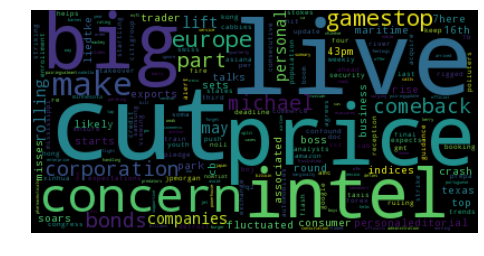

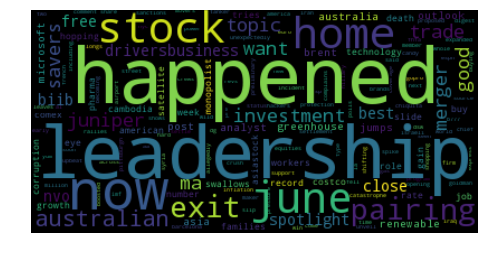

In [81]:
wordcloud = WordCloud(collocations=False).generate(positive)
wordcloud2 = WordCloud(collocations=False).generate(negative)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

look into the news which includes strange words, such as soya  
use seaborn to visialize the data

In [82]:
NEWS_df[NEWS_df['TITLE'].str.contains('surgesus', na=False)]

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,ticker


In [83]:
with open('stopwords.txt') as f:
    stop_words = []
    for line in f:
        stop_words.append(line.rstrip())

In [84]:
def eliminate_stop_words(counter):
    dummy = counter.copy()
    punc = set(string.punctuation)
    punc.update(['...', '–'])
    for key, num in dummy.items():
        if key.lower() in stop_words or key in punc:
            counter.pop(key)
    
    return counter

In [85]:
count_up = eliminate_stop_words(count_up)
count_down = eliminate_stop_words(count_down)

In [86]:
def create_freq_table(counter, num):
    """
    counter: counter object
    num: int, which specify how many most common words it is needed to return
    return: DataFrame
    """
    counter2 = counter.most_common(num)
    counter2 = sorted(counter2, key=lambda tup: tup[1], reverse=True)
    
    words_freqs_up = {'words': [tup[0] for tup in counter2],
                      'freqs': [tup[1] for tup in counter2]}
    words_freqs_df = pd.DataFrame(words_freqs_up)
    
    return words_freqs_df

In [87]:
words_freqs_up_df = create_freq_table(count_up, 10)
words_freqs_down_df = create_freq_table(count_down, 10)

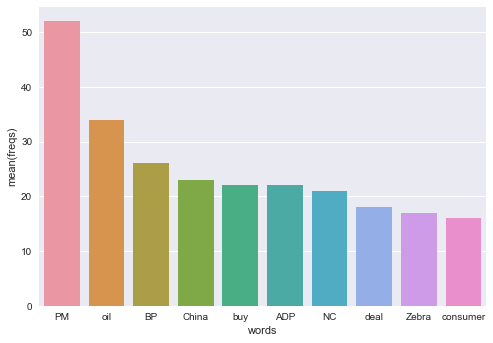

In [88]:
my_plot = sns.barplot(x='words', y='freqs', data=words_freqs_up_df)
my_plot.get_figure().savefig('freq_up.png', dpi=200)
sns.plt.show()

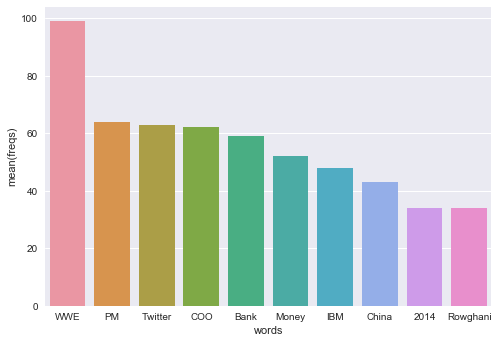

In [89]:
my_plot2 = sns.barplot(x='words', y='freqs', data=words_freqs_down_df)
my_plot2.get_figure().savefig('freq_down.png', dpi=200)
sns.plt.show()

In [107]:
words_freqs_up_df = create_freq_table(count_up, 20)
words_freqs_down_df = create_freq_table(count_down, 100)

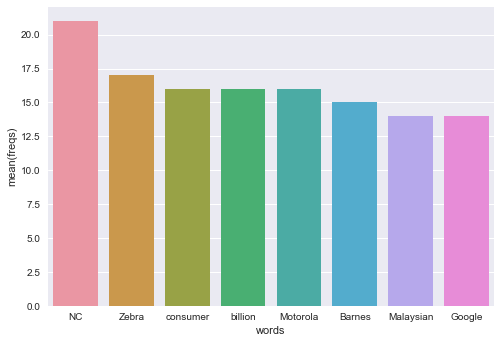

In [108]:
down_set = set(words_freqs_down_df.words)
words_freqs_up_df = words_freqs_up_df[words_freqs_up_df.apply(lambda row: row['words'] not in down_set, axis=1)]
my_plot = sns.barplot(x='words', y='freqs', data=words_freqs_up_df)
my_plot.get_figure().savefig('freq_up.png', dpi=200)
sns.plt.show()

In [113]:
words_freqs_up_df = create_freq_table(count_up, 100)
words_freqs_down_df = create_freq_table(count_down, 20)

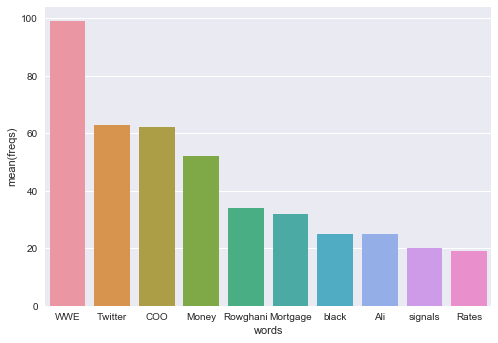

In [114]:
up_set = set(words_freqs_up_df.words)
words_freqs_down_df = words_freqs_down_df[words_freqs_down_df.apply(lambda row: row['words'] not in up_set, axis=1)]
my_plot = sns.barplot(x='words', y='freqs', data=words_freqs_down_df)
my_plot.get_figure().savefig('freq_up.png', dpi=200)
sns.plt.show()

In [ ]:
NEWS_df[NEWS_df['TITLE'].str.contains('WWE', na=False)]